# Dataset: [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction)

# Exploratory Data Analysis

Pada tahapan ini dilakukan beberapa langkah untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering. 

Dengan memastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat. Lalu mengeluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal), dan mencari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain.


## Deskripsi Variabel Data

|  Variable   | Definition   | 
| ---------| ---------| 
| id | Unique ID for the customer | 
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| Policy_Sales_Channel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested, 0 : Customer is not interested |


## Import Libraries

Pada tahapan ini dilakukan import library yang tersedia, sesuai dengan kebutuhan fungsi yang akan kita gunakan untuk pengolahan data saat ini. Ini memungkinkan pengembang untuk menghemat waktu dan usaha dalam mengembangkan aplikasi atau proyek baru.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

Pada tahapan ini dilakukan load dataset yang kita gunakan. Pada kasus ini menggunakan dataset sesuai resource dengan nama file train.csv. 

In [59]:
df = pd.read_csv('train.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Cuplikan Data

Kita memiliki 381.109 data yang akan digunakan yang masing - masing memiliki 12 kolom. Kolom - kolom tersebut memiliki arti :

1. Kolom **id** digunakan sebagai identitas unik bagi setiap nasabah.
2. Kolom **Gender** menunjukkan jenis kelamin nasabah, yang terdiri dari Male dan Female.
3. Kolom **Age** menunjukkan usia nasabah.
4. Kolom **Driving_License** menunjukkan apakah nasabah memiliki SIM atau tidak, dengan nilai 1 untuk memiliki SIM dan 0 untuk tidak memiliki SIM.
5. Kolom **Region_Code** menunjukkan kode wilayah tempat tinggal nasabah.
6. Kolom **Previously_Insured** menunjukkan apakah nasabah sudah memiliki asuransi sebelumnya atau belum, dengan nilai 1 untuk sudah memiliki asuransi dan 0 untuk belum memiliki asuransi.
7. Kolom **Vehicle_Age** menunjukkan usia kendaraan yang diasuransikan, dengan kategori 1-2 Year, < 1 Year, dan > 2 Years.
8. Kolom **Vehicle_Damage** menunjukkan apakah kendaraan yang diasuransikan pernah mengalami kerusakan atau tidak, dengan nilai Yes untuk pernah mengalami kerusakan dan No untuk belum pernah mengalami kerusakan.
9. Kolom **Annual_Premium** menunjukkan besarnya premi yang harus dibayar oleh nasabah dalam setahun.
10. Kolom **Policy_Sales_Channel** menunjukkan saluran penjualan kebijakan asuransi yang digunakan oleh nasabah.
11. Kolom **Vintage** menunjukkan berapa lama nasabah sudah menjadi pelanggan perusahaan asuransi.
12. Kolom **Response** menunjukkan apakah nasabah tertarik untuk membeli produk asuransi tambahan atau tidak, dengan nilai 1 untuk tertarik dan 0 untuk tidak tertarik.

In [61]:
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
379053,379054,Male,59,1,37.0,0,1-2 Year,Yes,2630.0,156.0,297,0
326600,326601,Male,39,1,28.0,0,1-2 Year,Yes,35739.0,124.0,63,1
23644,23645,Female,23,1,47.0,1,< 1 Year,No,26272.0,152.0,123,0
266466,266467,Male,24,1,15.0,0,< 1 Year,Yes,38119.0,151.0,288,0
363612,363613,Male,75,1,28.0,1,1-2 Year,No,47578.0,124.0,213,0


In [62]:
proporsi_response = df['Response'].value_counts(normalize=True) * 100
print(proporsi_response)

0    87.743664
1    12.256336
Name: Response, dtype: float64


## Statistical Summary

In [63]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Age', 'Vintage', 'Annual_Premium']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

In [64]:
# ringkasan statistik dari kolom numerik
df[nums].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.82,15.51,20.0,25.0,36.0,49.0,85.0
Vintage,381109.0,154.35,83.67,10.0,82.0,154.0,227.0,299.0
Annual_Premium,381109.0,30564.39,17213.16,2630.0,24405.0,31669.0,39400.0,540165.0


Beberapa pengamatan:
1. Rata-rata usia nasabah adalah `38.82 tahun`.
2. Rata-rata premi tahunan yang dibayar oleh nasabah adalah `30,564.39`.
3. Rata-rata jumlah hari sejak nasabah bergabung dengan perusahaan asuransi (vintage) adalah `154.35 hari`.
4. Standar deviasi usia nasabah adalah 15.51 tahun.
5. Standar deviasi premi tahunan adalah 17,213.16.
6. Standar deviasi vintage adalah 83.67 hari.
7. Usia nasabah termuda adalah 20 tahun dan yang tertua adalah 85 tahun.
8. Premi tahunan terendah yang dibayarkan oleh nasabah adalah 2,630 dan tertinggi adalah 540,165.
9. Rata-rata vintage untuk nasabah berada di sekitar `154 hari`.
10. Kuartil pertama dari usia nasabah adalah 25 tahun dan kuartil ketiga adalah 49 tahun. Hal ini menunjukkan bahwa sebagian besar nasabah berada di rentang usia antara 25 dan 49 tahun.
11. Kuartil pertama dari premi tahunan adalah 24,405 dan kuartil ketiga adalah 39,400. Ini menunjukkan bahwa sebagian besar nasabah membayar premi dalam rentang antara 24,405 dan 39,400.
12. Kuartil pertama dari vintage adalah 82 hari dan kuartil ketiga adalah 227 hari. Ini menunjukkan bahwa sebagian besar nasabah telah bergabung dengan perusahaan asuransi selama rentang waktu antara 82 dan 227 hari.

In [65]:
# categorical columns 
df[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']] = df[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']].astype(object)
df[cats].describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109.0,381109,381109,381109.0,381109
unique,2,2,53.0,2,2,155.0,2
top,Male,1,28.0,0,Yes,152.0,0
freq,206089,380297,106415.0,206481,192413,134784.0,334399


Beberapa pengamatan:
1. Terdapat dua jenis kelamin `(gender)`, yaitu Male dan Female.
2. Jumlah nasabah yang memiliki SIM `(Driving_License)` adalah 381109, dimana 380297 nasabah memiliki SIM dan 812 nasabah tidak memiliki SIM.
3. Terdapat 53 kode wilayah `(Region_Code)` yang tercatat dalam data.
4. Terdapat 155 saluran penjualan kebijakan `(Policy_Sales_Channel)` yang digunakan untuk menjual produk asuransi kepada nasabah.
6. Ada 206,481 nasabah yang belum memiliki asuransi sebelumnya `(Previously_Insured)`, dan 174,628 nasabah lainnya sudah memiliki asuransi sebelumnya.
7. Kendaraan yang diasuransikan terbagi menjadi tiga kategori umur `(Vehicle_Age)`, yaitu 1-2 tahun, < 1 tahun, dan > 2 tahun.
8.  Kendaraan yang diasuransikan juga terbagi menjadi dua kategori kerusakan `(Vehicle_Damage)`, yaitu Yes dan No. Sebanyak 192,413 nasabah memiliki kendaraan yang pernah mengalami kerusakan (Yes), - sementara sisanya 188,696 nasabah memiliki kendaraan yang belum pernah mengalami kerusakan (No).
9. Nasabah dengan jenis kelamin laki-laki (Male) lebih banyak dibandingkan dengan nasabah perempuan (Female), dengan jumlah 206,089 dan 175,020, masing-masing.
10. Hampir semua nasabah dalam dataset memiliki SIM `(Driving_License)`, hanya ada 812 nasabah yang tidak memiliki SIM.
11. Wilayah dengan kode 28.0 (Region_Code) memiliki jumlah nasabah terbanyak, yaitu sebesar 106,415 nasabah.
12. Saluran penjualan kebijakan dengan nomor 152.0 `(Policy_Sales_Channel)` digunakan oleh nasabah terbanyak dalam membeli produk asuransi, yaitu sebanyak 134,784 nasabah.
13. Lebih dari setengah nasabah (206,481) belum pernah memiliki asuransi sebelumnya (Previously_Insured).
14. Sebagian besar kendaraan yang diasuransikan dalam dataset berusia 1-2 tahun (200,316).
15. Kendaraan yang pernah mengalami kerusakan `(Vehicle_Damage = Yes)` dimiliki oleh sebagian besar nasabah (192,413).

# `1. Data Cleansing`

## Missing Data
Pada tahapan ini dilakukan proses mengatasi atau menangani nilai-nilai yang kosong atau tidak tersedia pada dataset. Hal ini diperlukan karena keberadaan `missing value` dapat memengaruhi kualitas dan akurasi hasil analisis yang dilakukan pada dataset.

In [66]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Dapat diketahui, dari Dataset yang diberikan terdiri dari 11 kolom dengan jumlah baris tidak diketahui (tidak disebutkan). Setiap kolom memiliki tipe data yang berbeda-beda, dengan jumlah `missing value (nilai kosong)` pada setiap kolom bernilai 0.

## Duplicated Data
Pada tahapan ini dilakukan proses mengidentifikasi dan menghapus atau mengubah data yang sama atau duplikat yang terdapat dalam suatu dataset. Duplikat dapat terjadi karena kesalahan input data, duplikasi data dari sumber yang berbeda, atau pengulangan data dalam waktu yang berbeda. Kehadiran data duplikat dapat mempengaruhi analisis dan model yang dihasilkan karena data duplikat dapat mempengaruhi hasil statistik dan menghasilkan model yang bias.

In [67]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

## Outlier Handling

Pada tahapan ini dilakukan proses untuk menangani data yang dianggap sebagai outlier, yaitu data yang jauh berbeda dengan data lainnya atau data yang berada di luar rentang normal atau standar. Outliers handling dilakukan untuk meminimalkan pengaruh data yang tidak biasa atau ekstrem terhadap analisis statistik atau machine learning yang akan dilakukan. 

Untuk modelling pada kondisi dataset ini, kami memutuskan untuk tidak melakukan handling outlier, karena tipe atau jenis data yang memiliki outlier tersebut berisikan informasi data yang memang benar adanya seperti itu.

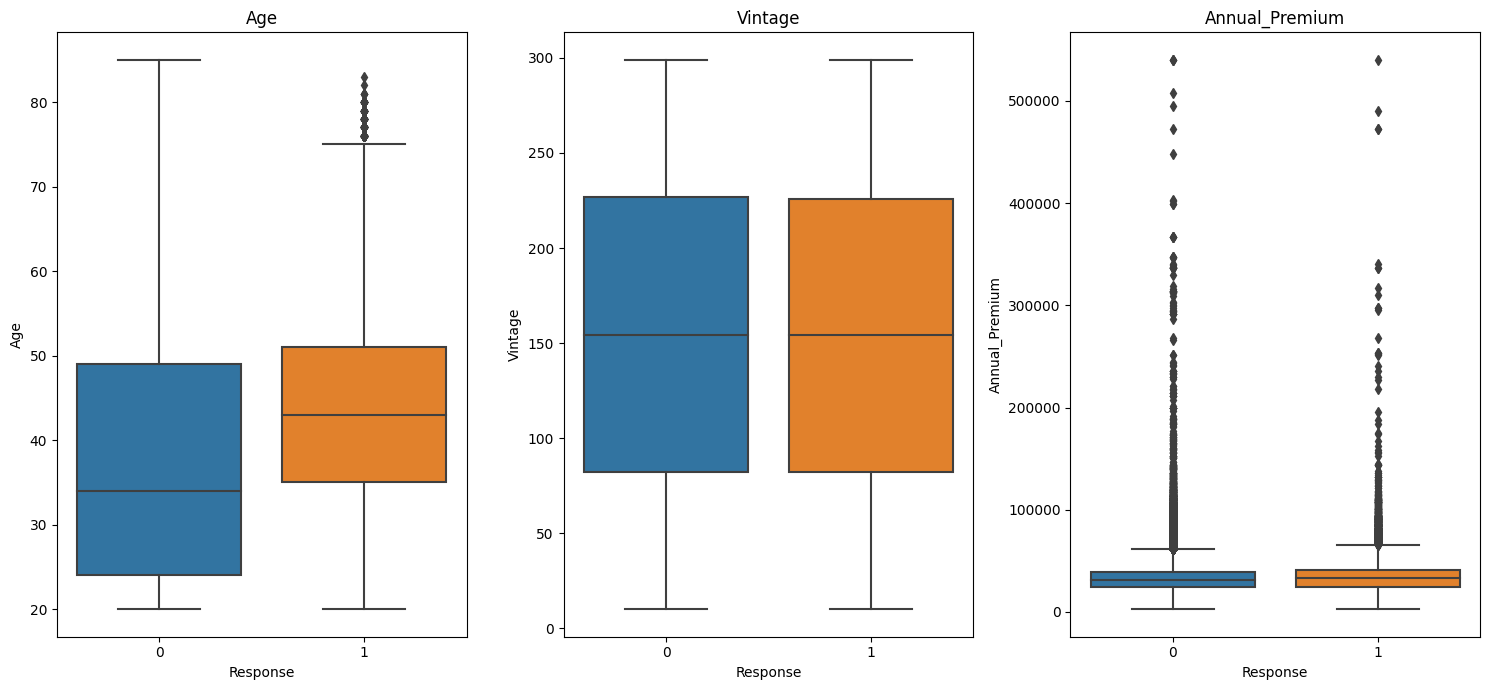

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,7))

for i in range(0, len(nums)):
    sns.boxplot(y=df[nums[i]],x=df["Response"], orient="v", ax=axes[i])
    axes[i].set_title(nums[i])
    
plt.tight_layout()
plt.show()

Kita ketahui, bahwa dari pada fitur yang termasuk `nums` kolom `Annual_Premium`, `Age` tidak perlu dilakukan handling outliers, karena untuk kasus pada dataset ini berapapun walau terdapat pencilan atau outlier pada fitur `Age`, setelah dilakukan pengecekan, pertimbangan dan diskuskusi lebih lanjut disimpulkan nilai pada outlier tersebut memang valid dan memang hanya menjadi minor diantara nilai lainnya. Maka tidak perlu dilakukan handling outlier.

# `2.Feature Transformation`

 adalah proses mengubah atau mentransformasikan fitur atau variabel dalam dataset menjadi bentuk yang lebih sesuai atau informatif untuk analisis atau pemodelan. Tujuan utama dari feature transformation adalah untuk meningkatkan kualitas fitur yang digunakan dalam pemodelan dan meningkatkan performa model yang akan dibangun.



In [69]:
# Membuat kolom baru untuk kategori Age
bins = [0, 30, 50, 100]
labels = ['Muda', 'Tua', 'Lansia']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Membuat kolom baru untuk kategori Vintage
bins = [0, 180, 999]
labels = ['New User', 'Retain User']
df['Vintage_Category'] = pd.cut(df['Vintage'], bins=bins, labels=labels)

Baris kode di atas digunakan untuk membuat dua kolom baru dalam DataFrame df, yaitu Age_Category dan Vintage_Category, yang masing-masing berisi kategori berdasarkan nilai dalam kolom Age dan Vintage.

Pertama, kita mendefinisikan batas interval atau bins untuk kategori-kategori yang ingin kita buat. Dalam contoh ini, untuk kolom Age, kita memiliki tiga kategori: "Muda" (0-30), "Tua" (31-50), dan "Lansia" (51-100). Sedangkan untuk kolom Vintage, kita memiliki dua kategori: "New User" (0-180) dan "Retain User" (181-999).

In [70]:
df['Total_Income'] = df['Annual_Premium'] * df['Vintage']

Baris kode di atas digunakan untuk membuat kolom baru dalam DataFrame df dengan nama Total_Income. Nilai dalam kolom Total_Income dihitung dengan mengalikan nilai dari kolom Annual_Premium dengan nilai dari kolom Vintage.

Secara lebih rinci, df['Annual_Premium'] mengacu pada kolom yang berisi jumlah premi tahunan, sedangkan df['Vintage'] mengacu pada kolom yang berisi jumlah bulan penggunaan atau lamanya pelanggan menggunakan layanan.

Dengan mengalikan nilai premi tahunan dengan lamanya penggunaan, kita dapat mendapatkan perkiraan pendapatan total dari setiap pelanggan dalam periode waktu tertentu.

Baris kode ini menambahkan kolom Total_Income ke DataFrame df, yang dapat digunakan untuk analisis atau pemodelan selanjutnya yang melibatkan pendapatan total pelanggan.

In [71]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['Age', 'Vintage', 'Annual_Premium', 'Total_Income']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

Karena ada penambahan kolom atau variable baru hasil dari ekstraksi, maka perlu dilakukan pengelompokan ulang kembali.

In [72]:
df = df.drop(['id', 'Region_Code', 'Policy_Sales_Channel'], axis=1)

Baris kode di atas digunakan untuk menghapus kolom-kolom tertentu dari DataFrame df, yaitu 'id', 'Region_Code', dan 'Policy_Sales_Channel'.

Fungsi drop() digunakan untuk menghapus kolom atau baris dari DataFrame. Pada baris kode tersebut, kita menggunakan df.drop() dengan argumen ['id', 'Region_Code', 'Policy_Sales_Channel'] untuk menentukan kolom-kolom yang akan dihapus.

In [73]:
mapping_Vehicle_Damage = {
    'Yes' : 1,
    'No' : 0
}

mapping_Vehicle_Age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2,
}

mapping_Age_Category = {
    'Muda' : 0,
    'Tua' : 1,
    'Lansia' : 2,
}

mapping_Vintage_Category = {
    'New User' : 0,
    'Retain User' : 1,
}

df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_Vehicle_Damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_Vehicle_Age)
df['Age_Category'] = df['Age_Category'].map(mapping_Age_Category)
df['Vintage_Category'] = df['Vintage_Category'].map(mapping_Vintage_Category)

df = pd.get_dummies(df, columns=['Gender'])

Baris kode di atas digunakan untuk melakukan mapping dan one-hot encoding pada beberapa kolom kategorikal dalam DataFrame df.

In [74]:
df_response_last = df.pop('Response')
df.insert(len(df.columns), 'Response', df_response_last)

Karena terdapat kolom baru, untuk membuat pengerjaan dataset menjadi lebih fokus, maka kami melakukan drop posisi untuk kolom Response.

In [75]:
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Age_Category,Vintage_Category,Total_Income,Gender_Female,Gender_Male,Response
0,44,1,0,2,1,40454.0,217,1,1,8778518.0,0,1,1
1,76,1,0,1,0,33536.0,183,2,1,6137088.0,0,1,0
2,47,1,0,2,1,38294.0,27,1,0,1033938.0,0,1,1
3,21,1,1,0,0,28619.0,203,0,1,5809657.0,0,1,0
4,29,1,1,0,0,27496.0,39,0,0,1072344.0,1,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Age                 381109 non-null  int64   
 1   Driving_License     381109 non-null  object  
 2   Previously_Insured  381109 non-null  object  
 3   Vehicle_Age         381109 non-null  int64   
 4   Vehicle_Damage      381109 non-null  int64   
 5   Annual_Premium      381109 non-null  float64 
 6   Vintage             381109 non-null  int64   
 7   Age_Category        381109 non-null  category
 8   Vintage_Category    381109 non-null  category
 9   Total_Income        381109 non-null  float64 
 10  Gender_Female       381109 non-null  uint8   
 11  Gender_Male         381109 non-null  uint8   
 12  Response            381109 non-null  object  
dtypes: category(2), float64(2), int64(4), object(3), uint8(2)
memory usage: 27.6+ MB


In [77]:
df = df.astype(float)

Baris kode di atas digunakan untuk mengubah tipe data (data type) dari seluruh kolom dalam DataFrame df menjadi float.

Dengan menggunakan metode astype(float), kita mengonversi tipe data dari semua kolom dalam DataFrame menjadi float. Tipe data float adalah tipe data numerik yang menyimpan bilangan desimal atau pecahan.

Untuk dilakukan pengajuan model nantinya.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 381109 non-null  float64
 1   Driving_License     381109 non-null  float64
 2   Previously_Insured  381109 non-null  float64
 3   Vehicle_Age         381109 non-null  float64
 4   Vehicle_Damage      381109 non-null  float64
 5   Annual_Premium      381109 non-null  float64
 6   Vintage             381109 non-null  float64
 7   Age_Category        381109 non-null  float64
 8   Vintage_Category    381109 non-null  float64
 9   Total_Income        381109 non-null  float64
 10  Gender_Female       381109 non-null  float64
 11  Gender_Male         381109 non-null  float64
 12  Response            381109 non-null  float64
dtypes: float64(13)
memory usage: 37.8 MB


# `3.Check Imbalanced Dataset`

In [79]:
response_counts = df['Response'].value_counts()
print(response_counts)

0.0    334399
1.0     46710
Name: Response, dtype: int64


# `4.Modelling`

In [80]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur (X) dan target (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baris kode di atas menggunakan modul train_test_split dari pustaka Scikit-learn (sklearn) untuk membagi dataset menjadi data latih (train) dan data uji (test) dalam tujuan pemodelan.

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

oversample = SMOTE(random_state=42, sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)

Baris kode di atas menggunakan modul SMOTE dari pustaka imbalanced-learn (imblearn) untuk melakukan oversampling pada dataset yang tidak seimbang secara kelas atau imbalance.

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
    

## Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
eval_classification(nb, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.18
Recall (Test Set): 0.00
F1-Score (Test Set): 0.01
AUC: 0.50


## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
eval_classification(knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.16
Recall (Test Set): 0.02
F1-Score (Test Set): 0.04
AUC: 0.50


## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.19
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.28
Recall (Test Set): 0.27
F1-Score (Test Set): 0.28
AUC: 0.59


## AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.31
Recall (Test Set): 0.14
F1-Score (Test Set): 0.20
AUC: 0.55


## CatBoost

In [91]:
from catboost import CatBoostClassifier

# # Split data menjadi data train dan test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cb = CatBoostClassifier(random_state=42)
cb.fit(X_train, y_train)

y_pred_prob = cb.predict_proba(X_test)[:, 1]  # ambil probabilitas untuk kelas positif
y_pred = (y_pred_prob >= 0.4).astype(int)  # ubah probabilitas menjadi label biner dengan threshold 0.5
eval_classification(cb, y_pred, X_train, y_train, X_test, y_test)

Learning rate set to 0.118484
0:	learn: 0.5401590	total: 139ms	remaining: 2m 18s
1:	learn: 0.4274593	total: 275ms	remaining: 2m 17s
2:	learn: 0.3767445	total: 410ms	remaining: 2m 16s
3:	learn: 0.3446596	total: 516ms	remaining: 2m 8s
4:	learn: 0.3169221	total: 675ms	remaining: 2m 14s
5:	learn: 0.3014463	total: 844ms	remaining: 2m 19s
6:	learn: 0.2919598	total: 1.02s	remaining: 2m 25s
7:	learn: 0.2859538	total: 1.17s	remaining: 2m 25s
8:	learn: 0.2824024	total: 1.34s	remaining: 2m 27s
9:	learn: 0.2792727	total: 1.49s	remaining: 2m 27s
10:	learn: 0.2769707	total: 1.72s	remaining: 2m 34s
11:	learn: 0.2755322	total: 1.97s	remaining: 2m 42s
12:	learn: 0.2742978	total: 2.17s	remaining: 2m 44s
13:	learn: 0.2734598	total: 2.4s	remaining: 2m 49s
14:	learn: 0.2726389	total: 2.66s	remaining: 2m 54s
15:	learn: 0.2720944	total: 2.92s	remaining: 2m 59s
16:	learn: 0.2716934	total: 3.12s	remaining: 3m
17:	learn: 0.2713762	total: 3.33s	remaining: 3m 1s
18:	learn: 0.2710749	total: 3.53s	remaining: 3m 2s


## XGBoost

In [94]:
from xgboost import XGBClassifier

# # Split data menjadi data train dan test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred_prob = xg.predict_proba(X_test)[:, 1]  # ambil probabilitas untuk kelas positif
y_pred = (y_pred_prob >= 0.4).astype(int)  # ubah probabilitas menjadi label biner dengan threshold 0.5
eval_classification(cb, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.39
Recall (Test Set): 0.06
F1-Score (Test Set): 0.11
AUC: 0.52
